<a href="https://colab.research.google.com/github/Rachhh53/MSDS-460-Decision-Analytics/blob/main/DiscussionBoardMod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pulp

     |████████████████████████████████| 14.2 MB 9.0 MB/s 


In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Setting up libcolamd2:amd64 (1:5.1.2-2) ...
Setting up libamd2:amd64 

In [ ]:
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK

# Mod 4 DiscussionBoard

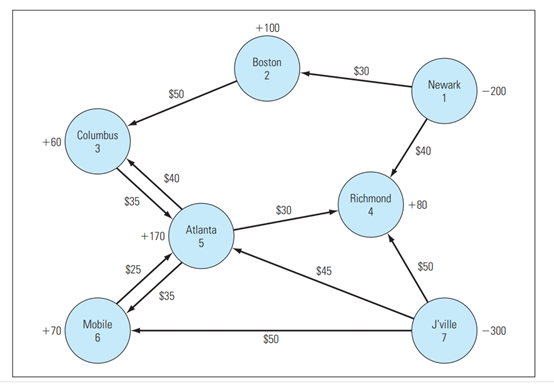

In [ ]:
# define variables
NB = LpVariable("NB", 0, None) # Newark to Boston
BC = LpVariable("BC", 0, None) # Boston to Columbus
CA = LpVariable("CA", 0, None) # Columbus to Atlanta
AC = LpVariable("AC", 0, None) # Atlanta to Columbus
AM = LpVariable("AM", 0, None) # Atlanta to Mobile
MA = LpVariable("MA", 0, None) # Mobile to Atlanta
JR = LpVariable("JR", 0, None) # Jacksonville to Richmond
NR = LpVariable("NR", 0, None) # Newark to Richmond
AR = LpVariable("AR", 0, None) # Atlanta to Richmond
JA = LpVariable("JA", 0, None) # Jacksonville to Atlanta
JM = LpVariable("JM", 0, None) # Jacksonville to Mobile

In [ ]:
# defines the problem
prob4 = LpProblem("problem", LpMinimize)

In [ ]:
# define constraints
prob4 += NB == 100
prob4 += BC+AC-CA == 60
prob4 += CA+MA+JA-AC-AM-AR == 170
prob4 += AM+JM-MA == 70
prob4 += AR+NR+JR == 80
prob4 += NB+NR <= 200
prob4 += JR+JA+JM <= 300

In [ ]:
# define objective function
prob4 += 30*NB+50*BC+35*CA+40*AC+35*AM+25*MA+30*AR+40*NR+50*JR+45*JA+50*JM

In [ ]:
# solve the problem
prob4.writeLP("prob4.lp")
prob4.solve(GLPK(options=['--ranges', 'prob4.sen']))
print ("Status:", LpStatus[prob4.status])

Status: Optimal


In [ ]:
# Note, we are only able to get sensitivity information because we are solving
# as a linear program.  If we solved as an Integer Program, then no 
# sensitivity information would be available.

for v in prob4.variables():
    print(v.name, "=", v.varValue)

print ("Objective", value(prob4.objective))
print ("")

AC = 0.0
AM = 0.0
AR = 0.0
BC = 60.0
CA = 0.0
JA = 170.0
JM = 70.0
JR = 0.0
MA = 0.0
NB = 100.0
NR = 80.0
Objective 20350.0

